# 6.2 Exploring relationships

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path

path = r'/Users/kurtson/Desktop/House Sales'

In [5]:
df = pd.read_csv(os.path.join(path,'Prepared Data', 'cleaned_home.csv'))

### 2. Exploring Relationships

#### Renaming Columns:

In [6]:
df.shape

(21613, 18)

In [7]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [8]:
#dropping Unnamed: 0 as it is unnecessary
df = df.drop(columns = ['Unnamed: 0'])

In [9]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

In [10]:
# Create a correlation matrix using pandas

df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude
price,1.000000,0.315297,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626
bedrooms,0.315297,1.000000,0.529069,0.591361,0.032834,0.181181,-0.006594,0.081956,0.025047,0.366479,0.490589,0.309276,0.159255,0.019647,-0.157122,-0.010695,0.133980
bathrooms,0.525138,0.529069,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042
sqft_living,0.702035,0.591361,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223
sqft_lot,0.089661,0.032834,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521
floors,0.256794,0.181181,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419
waterfront,0.266369,-0.006594,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910
view,0.397293,0.081956,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400
condition,0.036362,0.025047,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500
grade,0.667434,0.366479,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372


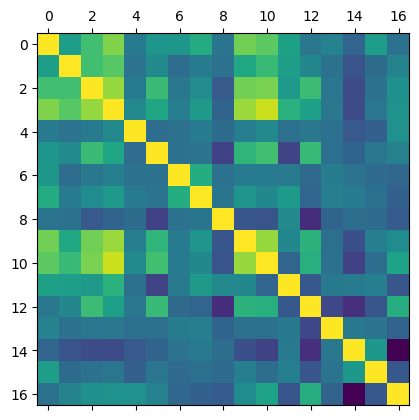

In [11]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

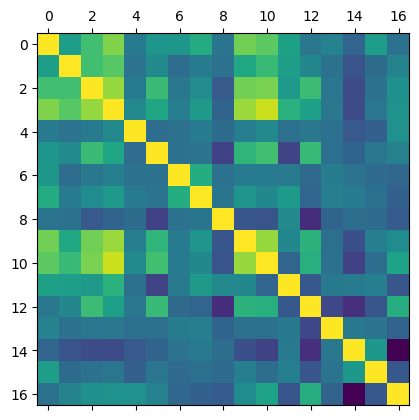

In [12]:
# Save figure
plt.matshow(df.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [13]:
#current dir
cwd = os.getcwd()
cwd

'/Users/kurtson/Desktop/House Sales/Assignments'

Text(0.5, 1.0, 'Correlation Matrix')

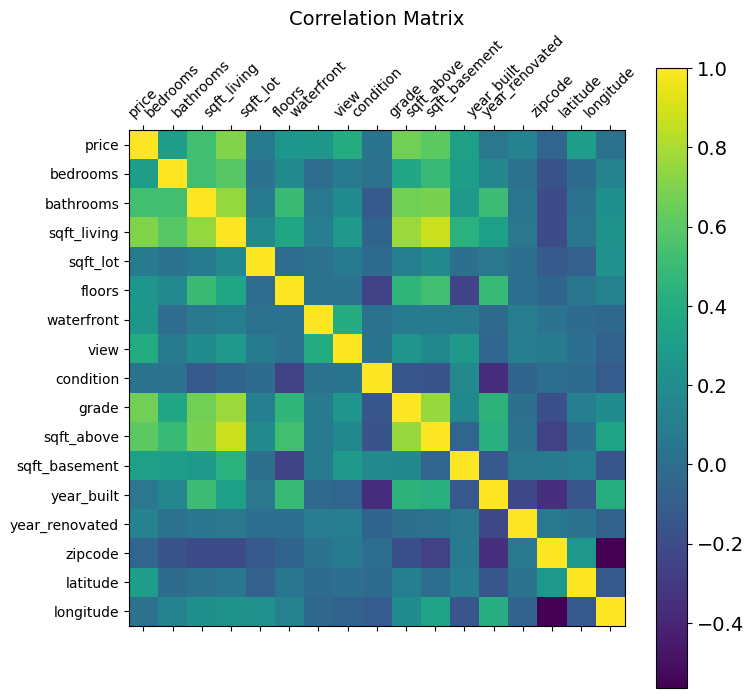

In [14]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Create a correlation heatmap using seaborn:

In [15]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['price', 'year_built', 'year_renovated', 'sqft_living', 'sqft_lot', 'grade']]

In [16]:
sub

,price,year_built,year_renovated,sqft_living,sqft_lot,grade
0,221900.0,1955,0,1180,5650,7
1,538000.0,1951,1991,2570,7242,7
2,180000.0,1933,0,770,10000,6
3,604000.0,1965,0,1960,5000,7
4,510000.0,1987,0,1680,8080,8
...,...,...,...,...,...,...
21608,360000.0,2009,0,1530,1131,8
21609,400000.0,2014,0,2310,5813,8
21610,402101.0,2009,0,1020,1350,7
21611,400000.0,2004,0,1600,2388,8


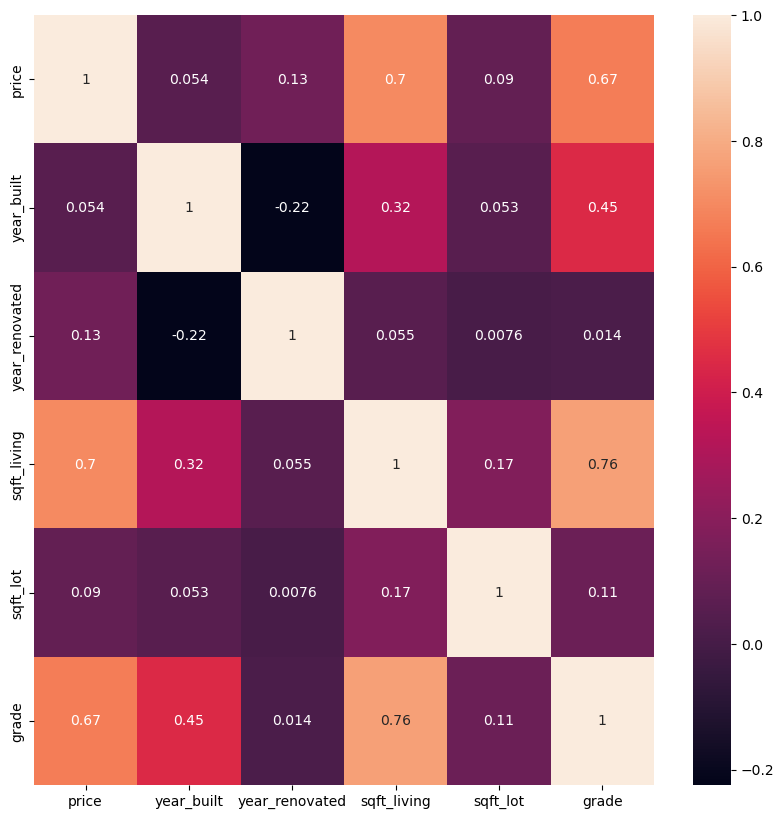

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

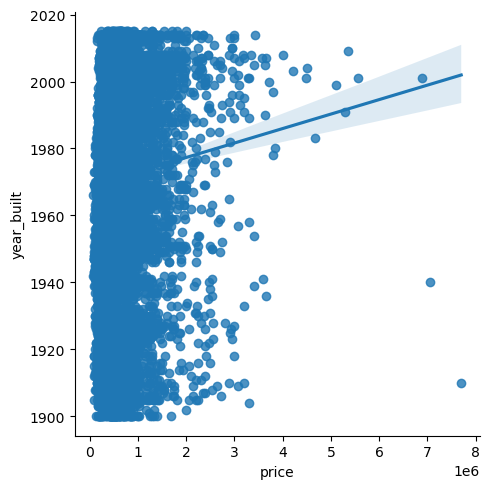

In [18]:
# Create a scatterplot for the "price" and "year_built" columns in seaborn

sns.lmplot(x = 'price', y = 'year_built', data = df)

In [19]:
#Export df
df.to_csv(os.path.join(path, 'Prepared Data', 'cleaned_home.csv'))